# Importing necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
from sklearn import decomposition

## Load MNIST dataset

In [2]:
data_set0 = pd.read_csv('mnist_training_dataset.csv')

In [3]:
print(data_set0.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [4]:
#Saving labels to a variable called label.
label = data_set0['label']

In [5]:
#Dropping label column.
data_set1 = data_set0.drop("label", axis = 1) 

In [6]:
print(label.shape)
print(data_set1.shape)

(42000,)
(42000, 784)


### Check if everything works perfectly

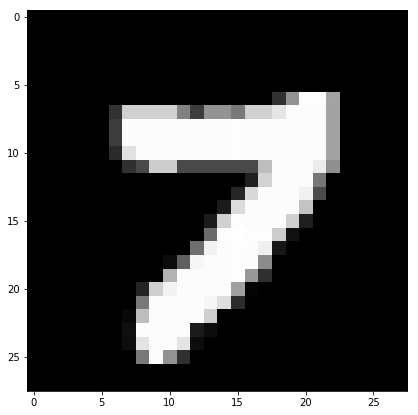

7


In [7]:
#Plotting a random number

plt.figure(figsize=(7,7))
idx = 2691 #Enter any random index value from 0 to 41999.

grid_data = data_set1.iloc[idx].values.reshape(28,28)  #Use 'as_matrix()' if 'values' doesn't work.
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

# Manually doing PCA step by step

In [9]:
labels = label.head(42000)
data = data_set1.head(42000)

print(data.shape)

(42000, 784)


### 1.Data - preprocessing

In [10]:
#Standardizing the data.
#StandardScaler is present in 'sklearn.preprocessing' module.

standardized_data = StandardScaler().fit_transform(data.astype(float))
print(standardized_data.shape)

(42000, 784)


### 2.Calculate the covariance matrix

In [11]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T , sample_data) #Vector-vector multiplication
print (covar_matrix.shape)

(784, 784)


$\textbf{Note}$: The covariance matrix must be a squre-symmetric-matrix.

### 3.Calculate the eigen values and eigen vectors

In [13]:
"""Since we want to visualize the dataset in 2-d, we require the top(max) two eigen values and their corresponding eigen vectors.
If we required the dataset in n-d, we'd require the top(max) n eigen values and their corresponding eigen values."""
 
#'eigh' function returns the eigen values in asending order. Therefore, the top two eigen values will be 782 and 783.
#'eigvals' is defined from lower value to heigher value.
# eigh is present in the module 'scipy.linalg'.

values, vectors = eigh(covar_matrix, eigvals=(782,783))
print(vectors.shape)

(784, 2)


In [14]:
#Converting the eigen vectors into (2,d) shape for easyness of further computation in calculating the new coordinates.

vectors = vectors.T
print(vectors.shape)

(2, 784)


### 4.Calculate the new coordinates on the plane formed by the principal eigen vectors

In [18]:
""" Projecting the original data sample on the plane 
formed by two principal eigen vectors by vector-vector multiplication."""

new_coordinates = np.matmul(vectors, sample_data.T)  #Vector-vector multiplication
print ("Resultant new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

Resultant new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [19]:
#Appending label to the 2d projected data.

new_coordinates = np.vstack((new_coordinates, labels)).T

#Creating a new data frame for ploting the labeled points.

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


### 5.Plot the 2-d points

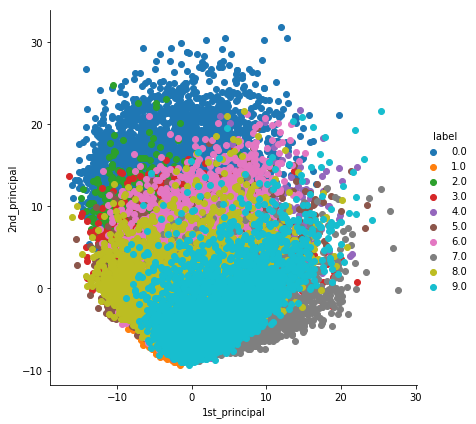

In [21]:
#Plotting with Seaborn.

sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend() 
#Use size if height results in warning.

plt.show()

$\textbf{Note}$: For doing PCA, there is a simple function PCA() in scikit-learn that can be used and we do not manually have    to do the steps mentioned above. All the above procedures are well handled by the scikit-learn library. 

# PCA using scikit-learn library

### 1.Initialize PCA.

In [22]:
#decomposition is present in sklearn.

pca = decomposition.PCA() 


### 2.Configure the parameters

In [23]:
#The number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


In [24]:
#Attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

### 3.Plot the 2-d points 

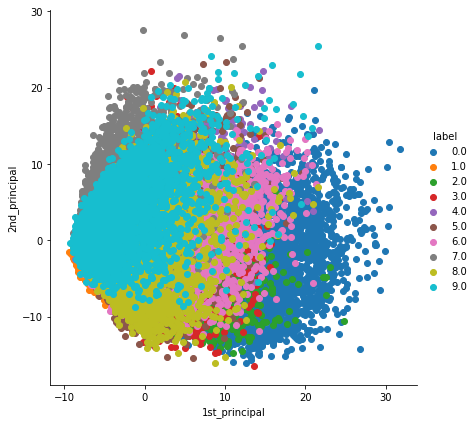

In [26]:
#Creating a new dataframe which helps us in ploting the result data.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
#Use size if height results in warning.

plt.show()

## Conclusion

- PCA doesn't do a very great job in visualizing data that has been reduced from higher dimensions(say 784) to very low dimensions(say 2).
- We can clearly see there is a huge overlapping of the data points and it is very difficult to identify all the data points.
- We can apply some other data visualization techniques such as t-SNE which might work better than PCA.